## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')

from multiprocessing import Pool

[nltk_data] Downloading package punkt to /Users/Joel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Joel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Joel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/Joel/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Joel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Question 1

### 1. A naive analysis

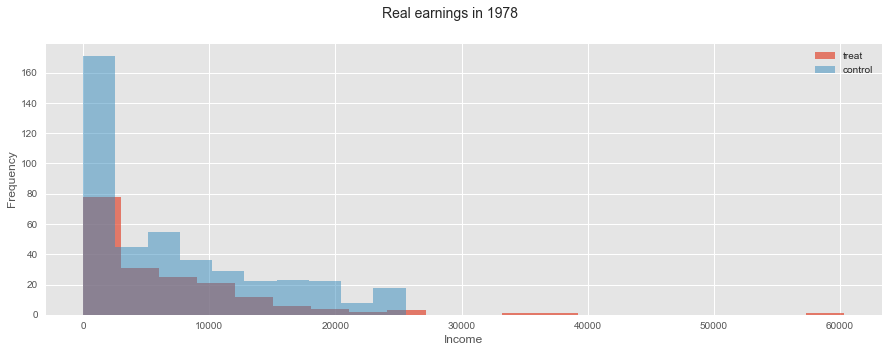

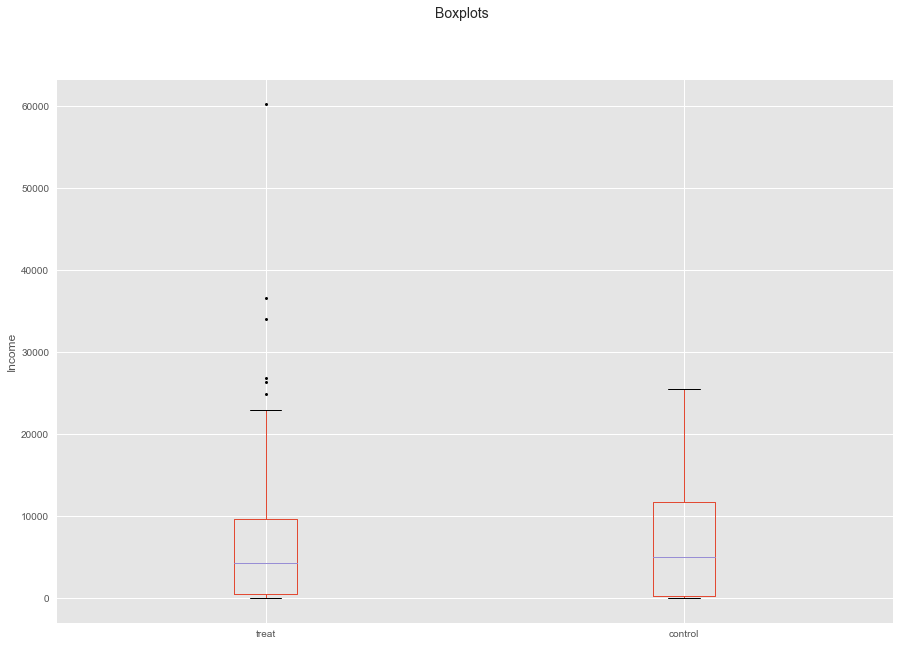

Number of people in treat group:  185 
Number of people in control group:  429


In [154]:
df = pd.read_csv('lalonde.csv')

treat_group_o = df[df['treat'] == 1]
control_group_o = df[df['treat'] == 0]

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharey=True)
fig.suptitle('Real earnings in 1978', fontsize=14)
treat_group_o['re78'].plot.hist(bins = 20, ax=axes, alpha=0.7, label='treat')
control_group_o['re78'].plot.hist(bins = 10, ax=axes, alpha=0.5, label='control')
axes.legend(loc='upper right')
axes.set_xlabel('Income')
plt.show()

merge = pd.concat([treat_group_o, control_group_o], axis=1)
merge.columns = ['treat', 'control']

fig, axes = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle("Boxplots", fontsize=14)
merge.plot.box(ax=axes, sym='k.')
axes.set_ylabel('Income')
plt.show()

num_people_part = df[df['treat'] == 1]['re78'].shape[0]
num_people_not_part = df[df['treat'] == 0]['re78'].shape[0]

print('Number of people in treat group: ', num_people_part, '\nNumber of people in control group: ', num_people_not_part)

**Conclusion**: From this naive analysis, we can see that participating in the job training program does not imply a significant increase of the income, it is even doing worst looking at the general trend. Indeed, we see that the median income from people who did not take the job training program is slightly higher from the ones who did take it. A few people (outliers) seemed to have fully benefit from the program, but as it concerns only a very small proportion, we cannot draw similar conclusion for the overall group. We also notice that the two categories are not evenly represented: there is much more people who did not participate in the JTP.

### 2. A closer look at the data

In this section, we focus the analysis of the data in four different contexts:

- social status,
- school background,
- ethnic origin,
- real earnings.

In [298]:
def plot_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    treat_group[right_column].plot.hist(bins=10,ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=20,ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    plt.show()
    
import matplotlib.ticker as ticker

def plot_1binary_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    treat_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()
    
def plot_2binary_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left',ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left',ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    treat_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

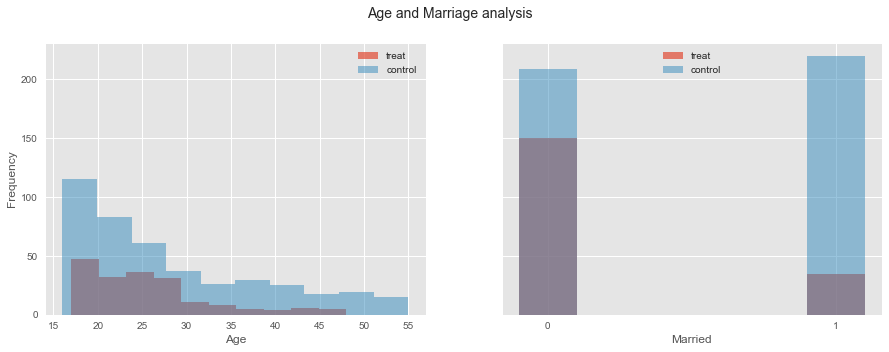

In [267]:
plot_binary_(treat_group_o, control_group_o, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

**Comments**: Apart from the poor equal representation of the two categories raised in the previous comment, there is a similar distribution of ages. However, we cannot say the same for the distribution of married people among the groups. Indeed, there is an even number of married and single people who did not participate in the JTP, but there is a significant difference among the ones who did participate.

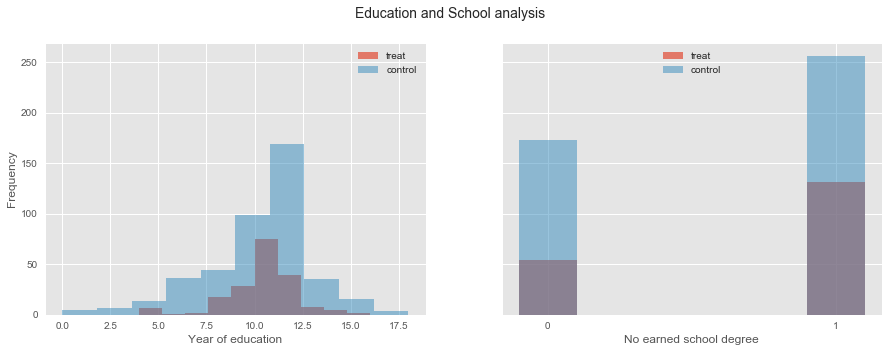

In [270]:
plot_1binary_(treat_group_o, control_group_o, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')

**Comments**: For the school background, we see that both components are represented in a similar fashion, if we, again, ignore the misrepresentation of the two catgories.

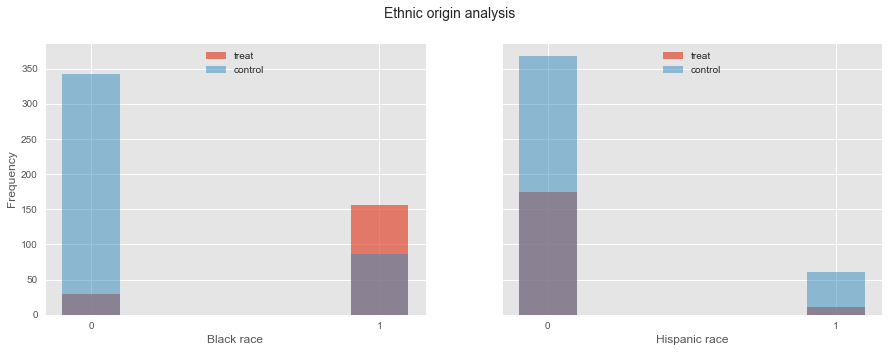

In [278]:
plot_2binary_(treat_group_o, control_group_o, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

**Comments**: If we compare the black race to the other ethnic groups we see that the category of people who participated in the JTP is much more represented. We have the exact opposite for the hispanic race. We can conlcude that the representation of the different ethnic origins is very badly represented. 

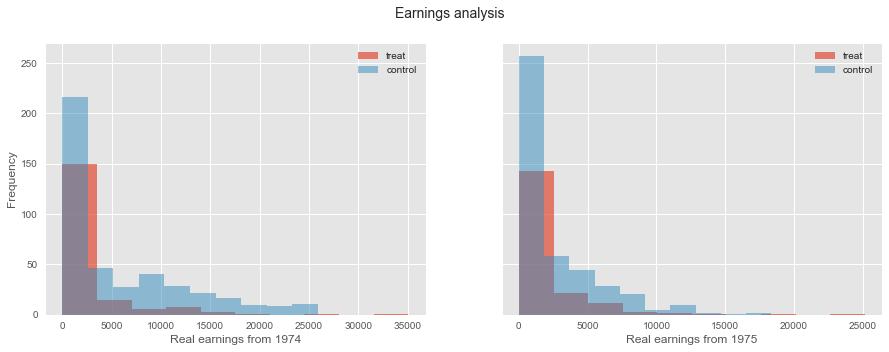

In [152]:
plot_(treat_group_o, control_group_o, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

**Comments**: The earnings do not fit very well between the treat and control groups.

All these observations allow us to realize that the sample selected for this analysis is very poorly represented in terms of the selected features. There is too much disparity. These inequalities skew the conclusions we can draw from the results obtained in the naive analysis. A much more sophisticated analysis is necessary to couteract these inequities.

### 3. A propensity score model

In [82]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

# the features
X = df[['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']]
# the output
y = df['treat']

model = logistic.fit(X, y)
# accuracy of the model
score = model.score(X,y)
# probability of each datapoint to be in treat group
probs_distr = model.predict_proba(X)[:,1]

print('Accuracy of logistic regression model: {0:.2f}%' .format(score*100))

Accuracy of logistic regression model: 80.78%


### 4. Balancing the dataset via matching

In [ ]:
import networkx as nx

idx_treat = np.where(df['treat'] == 1)[0] # participated
idx_control = np.where(df['treat'] == 0)[0] # not participated

# create a graph
G = nx.Graph()

# add all the indexes as nodes in the graph
for idx in df.index:
    G.add_node(idx)
    
# build the graph with weight between nodes as the distance we want to optimize
for idx_t in idx_treat:
    for idx_c in idx_control:
        w = 1 - (np.abs(probs_distr[idx_t] - probs_distr[idx_c]))
        G.add_edge(idx_t, idx_c, weight=w)   
        
# dictionary with pairs where the weight is maximum
tot_matching = nx.max_weight_matching(G)

In [104]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# take the first 185 pairs of key-value
eq_matching = take(num_people_part, tot_matching.items())

185 185 185


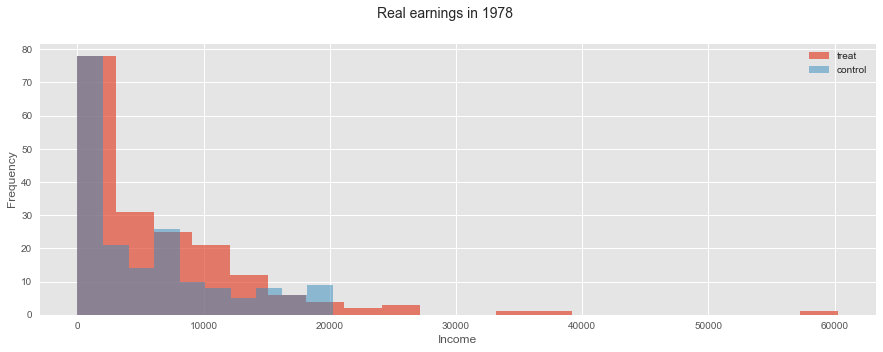

In [135]:
idx_control_sel = [x[1] for x in eq_matching]

# define the new treat and control groups
treat_group = df.loc[idx_treat]
control_group = df.loc[idx_control_sel]

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharey=True)
fig.suptitle('Real earnings in 1978', fontsize=14)
treat_group['re78'].plot.hist(bins = 20, ax=axes, alpha=0.7, label='treat')
control_group['re78'].plot.hist(bins = 10, ax=axes, alpha=0.5, label='control')
axes.legend(loc='upper right')
axes.set_xlabel('Income')
plt.show()

**Comments**: We see that there is a much better fit between the two categories compared to the same plot of part 1.

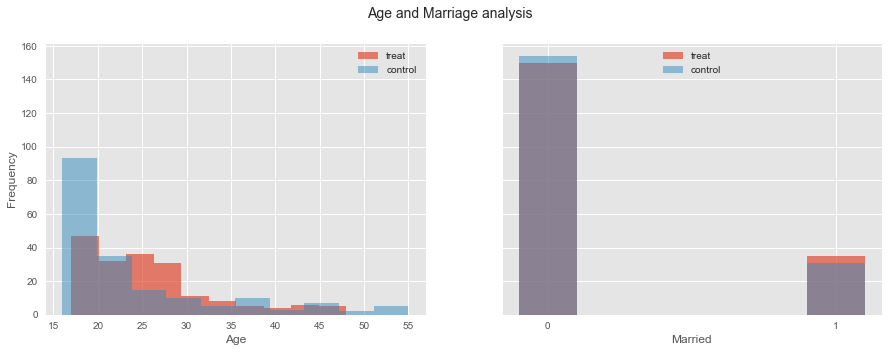

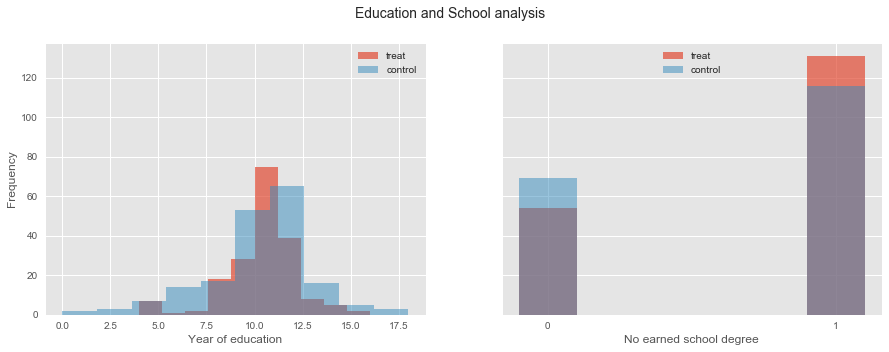

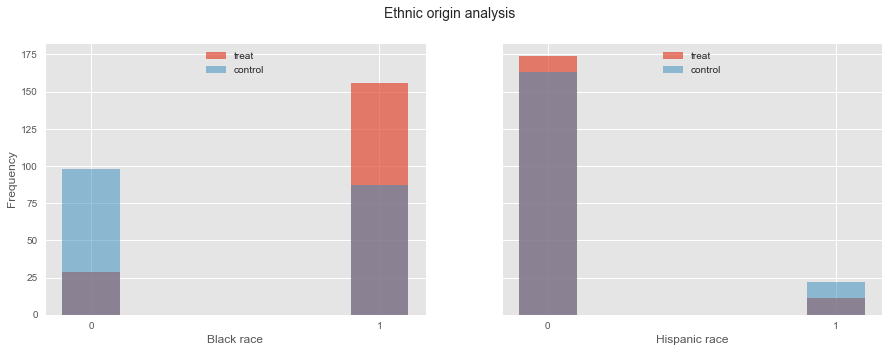

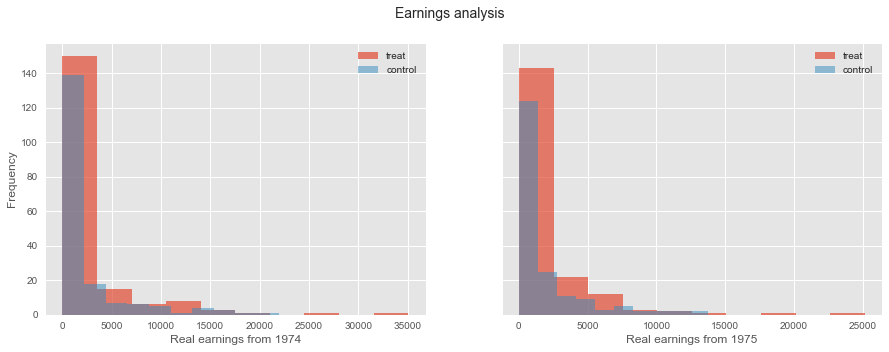

In [282]:
# social status
plot_1binary_(treat_group, control_group, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

# school background
plot_1binary_(treat_group, control_group, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')
# ethnic origin
plot_2binary_(treat_group, control_group, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

# real earnings
plot_(treat_group, control_group, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

**Comments**: The matches are not perfect yet but the difference between them has been greatly decreased. As a result, the conclusions drawn from the analysis will not be as biased as in the previous case.

### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching? Would you say your dataset is sufficiently balanced? If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature. Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.

Looking at all the features, we see that the one that needs to be improved in priority is the black feature.

In [164]:
num_black_treat = treat_group.black.sum()
num_black_control = control_group.black.sum()

print('There is {} black people in the treat group, and {} black people in the control group.'
      .format(num_black_treat, num_black_control))

There is 156 black people in the treat group, and 87 black people in the control group.


In [356]:
current_df = pd.concat([treat_group, control_group])
print(current_df.shape)
idx_to_del = current_df.index[(current_df['treat'] == 1) & (current_df['black'] == 1)]
idx_to_del.shape[0]
idx_to_del_l = idx_to_del[:69].tolist()

df2 = current_df.drop(idx_to_del_l)
print(df2.shape)
df2

"""
# take only the blacks
idx_to_del = current_df.index[current_df['black'] == 0].tolist()
print(len(idx_to_del))
df2 = current_df.drop(idx_to_del)
print(df2.shape)
df2"""

(370, 11)
(301, 11)


"\n# take only the blacks\nidx_to_del = current_df.index[current_df['black'] == 0].tolist()\nprint(len(idx_to_del))\ndf2 = current_df.drop(idx_to_del)\nprint(df2.shape)\ndf2"

In [359]:
print(idx_treat.shape, idx_control.shape)

(116,) (185,)


In [358]:
idx_treat = np.where(df2['treat'] == 1)[0] # participated
idx_control = np.where(df2['treat'] == 0)[0] # not participated

# create a graph
G = nx.Graph()

# add all the indexes as nodes in the graph
for idx in df2.index:
    G.add_node(idx)
    
# build the graph with weight between nodes as the distance we want to optimize
for idx_t in idx_treat:
    for idx_c in idx_control:
        w = 1 - (np.abs(probs_distr[idx_t] - probs_distr[idx_c]))
        G.add_edge(idx_t, idx_c, weight=w)   
        
# dictionary with pairs where the weight is maximum
tot_matching = nx.max_weight_matching(G)

In [360]:
# take the first 185 pairs of key-value
eq_matching = take(116, tot_matching.items())

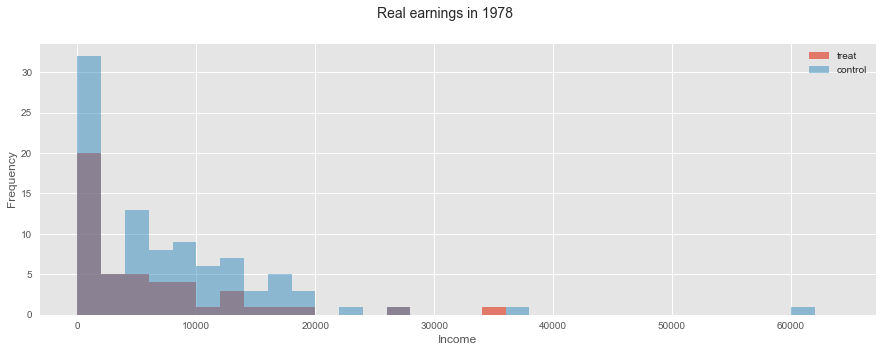

In [361]:
idx_treat_sel = [x[0] for x in eq_matching]
idx_control_sel = [x[1] for x in eq_matching]

# define the new treat and control groups
treat_group_b = df2.loc[idx_treat_sel]
control_group_b = df2.loc[idx_control_sel]

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharey=True)
fig.suptitle('Real earnings in 1978', fontsize=14)
treat_group_b['re78'].plot.hist(bins = np.arange(0, 65000, 2000), ax=axes, alpha=0.7, label='treat')
control_group_b['re78'].plot.hist(bins = np.arange(0, 65000, 2000), ax=axes, alpha=0.5, label='control')
axes.legend(loc='upper right')
axes.set_xlabel('Income')
plt.show()

In [362]:
print(treat_group_b.shape, control_group_b.shape)

(116, 11) (116, 11)


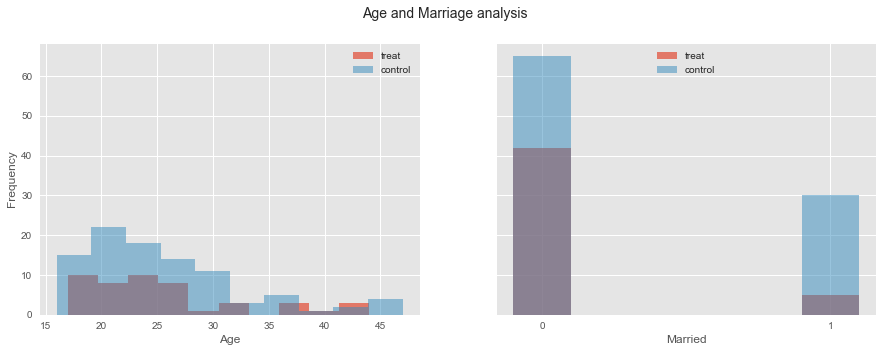

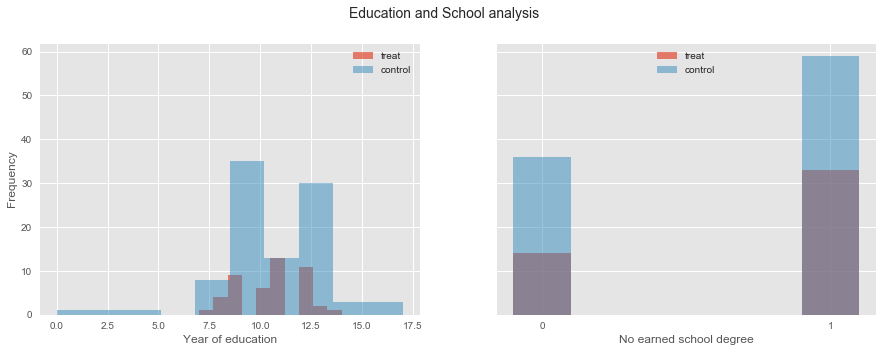

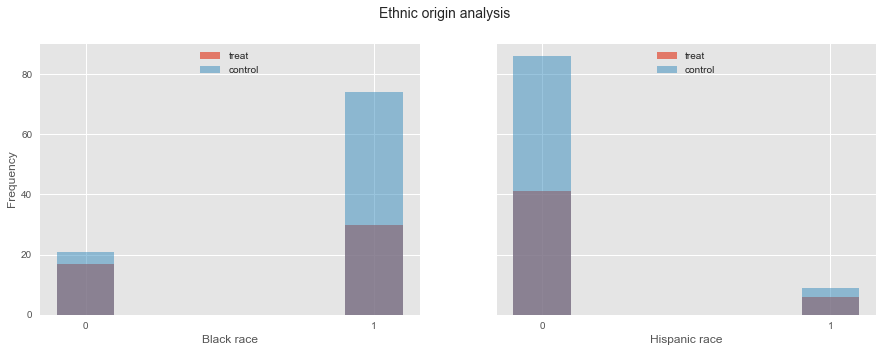

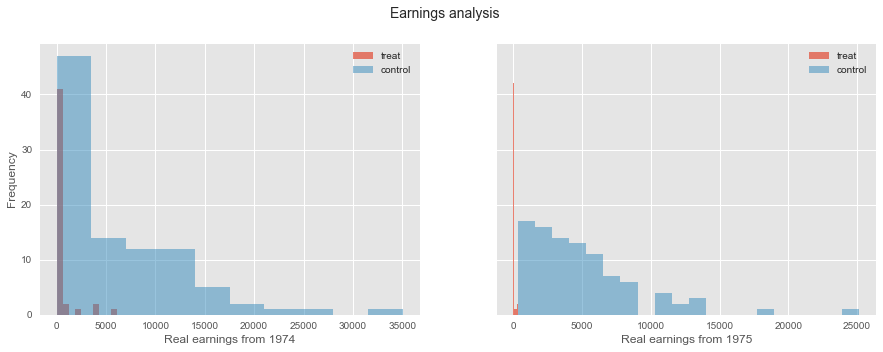

In [363]:
# social status
plot_1binary_(treat_group_b, control_group_b, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

# school background
plot_1binary_(treat_group_b, control_group_b, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')
# ethnic origin
plot_2binary_(treat_group_b, control_group_b, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

# real earnings
plot_(treat_group_b, control_group_b, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

### 6. A less naive analysis

In [346]:
control_group_b

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NSW174,1.0,19.0,10.0,1.0,0.0,0.0,1.0,4121.9490,6056.754,0.0000
199,PSID15,0.0,22.0,14.0,1.0,0.0,1.0,0.0,748.4399,11105.370,18208.5500
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NSW170,1.0,21.0,9.0,1.0,0.0,0.0,1.0,6416.4700,5749.331,743.6666


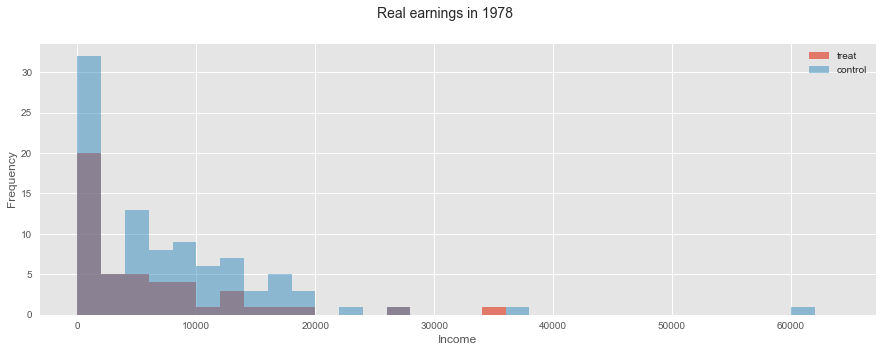

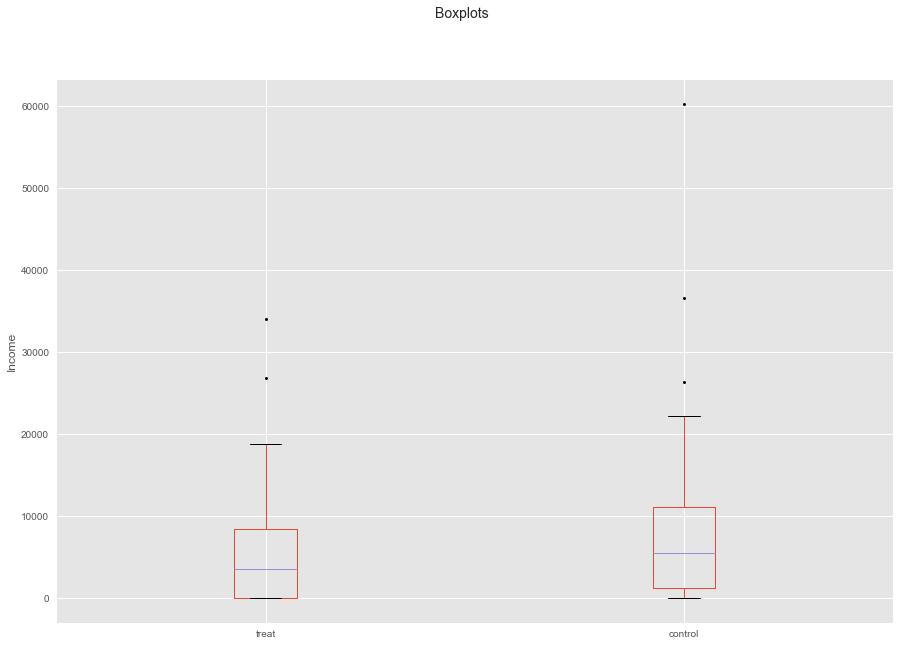

Number of people in treat group:  116 
Number of people in control group:  185


In [364]:
fig, axes = plt.subplots(1, 1, figsize=(15,5), sharey=True)
fig.suptitle('Real earnings in 1978', fontsize=14)
treat_group_b['re78'].plot.hist(bins = np.arange(0, 65000, 2000), ax=axes, alpha=0.7, label='treat')
control_group_b['re78'].plot.hist(bins = np.arange(0, 65000, 2000), ax=axes, alpha=0.5, label='control')
axes.legend(loc='upper right')
axes.set_xlabel('Income')
plt.show()

merge = pd.concat([treat_group_b['re78'], control_group_b['re78']], axis=1)
merge.columns = ['treat', 'control']

fig, axes = plt.subplots(1, 1, figsize=(15,10))
fig.suptitle("Boxplots", fontsize=14)
merge.plot.box(ax=axes, sym='k.')
axes.set_ylabel('Income')
plt.show()

num_people_part = df2[df2['treat'] == 1]['re78'].shape[0]
num_people_not_part = df2[df2['treat'] == 0]['re78'].shape[0]

print('Number of people in treat group: ', num_people_part, '\nNumber of people in control group: ', num_people_not_part)

## Question 2

In [119]:
news = fetch_20newsgroups(subset='all')

In [120]:
X = news.data
Y = news.target
# Split data using stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
    test_size=0.1, random_state=7, stratify=Y)

# Create a stratified kfold cross-validation 
SKF = StratifiedKFold(10, shuffle=True, random_state=7)

vectorizer = TfidfVectorizer().fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)



In [121]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
accuracy_score(pred, Y_test)

0.65782493368700268

In [ ]:
tuned_parameters = {
    'n_estimators': list(range(0, 101, 10))[1:],
    'max_depth': list(range(0, 101, 10))[1:]
} 

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=SKF, 
                   scoring='accuracy', n_jobs=16, refit=True, 
                   return_train_score=True, verbose=1)

clf.fit(X_train, Y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    3.5s


                                   params  mean_test_score
48  {'max_depth': 41, 'n_estimators': 81}         0.809976
[ 1 11 21 31 41]


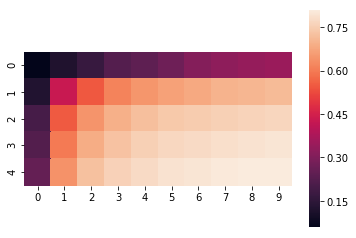

In [126]:
res = pd.DataFrame(clf.cv_results_)
print(res[res['rank_test_score'] == 1][['params', 'mean_test_score']])
hm = pd.concat([res['params'].apply(pd.Series), res['mean_test_score']], axis=1)
hm.fillna(11, inplace=True)
max_depth_labs = hm['max_depth'].unique() 
print(max_depth_labs)
nb_est_labs = hm['n_estimators'].unique() 
mat = np.zeros(shape=(len(max_depth_labs), len(nb_est_labs)))

for i, depth in enumerate(max_depth_labs):
    for j, n_est in enumerate(nb_est_labs):
        mat[i, j] = hm[(hm['max_depth']==depth) & (hm['n_estimators']==n_est)]['mean_test_score'].values[0]
    
sns.heatmap(mat, square=True)
plt.show()

In [10]:
model = clf.best_estimator_
pred = model.predict(X_test)
accuracy_score(pred, Y_test)

0.76339522546419103

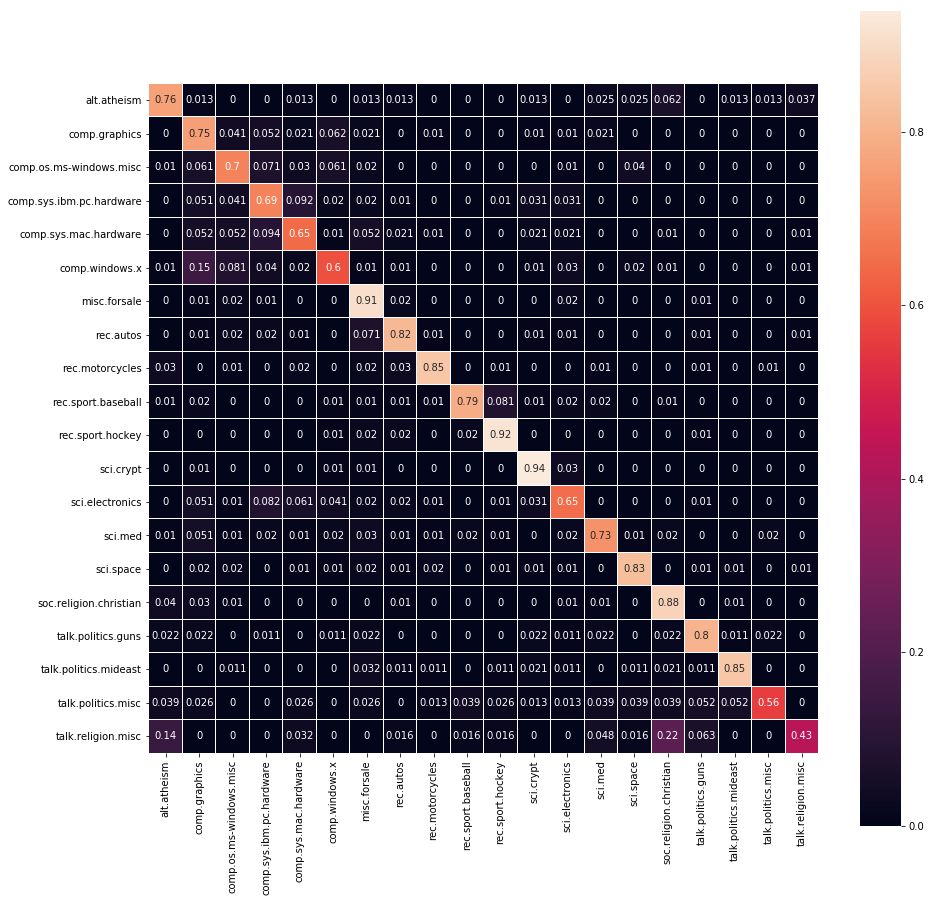

In [36]:
cm = confusion_matrix(Y_test, pred)
cm = pd.DataFrame(cm, index=news.target_names, 
                  columns=news.target_names)
cm = cm.div(cm.sum(axis=1), axis=0)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, square=True, annot=True, linewidths=0.1)
plt.show()

# Test NLP

In [4]:
tokens = word_tokenize('The cat-dog is huge and Alkpote is compromised 0b524')
tagged = nltk.pos_tag(tokens)
porter = PorterStemmer()
stop_words = stopwords.words('english')

def preprocess(x):
    tokens = word_tokenize(x)
    tokens = nltk.pos_tag(tokens)
    tokens = [t[0] for t in tokens if t[1] != 'NNP']
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t.isalpha()]
    clean = " ".join(tokens)
    return clean

pool = Pool(16)    

X_taz = pool.map(preprocess, X)


Process ForkPoolWorker-2:
Process ForkPoolWorker-16:
Process ForkPoolWorker-15:
Process ForkPoolWorker-4:
Process ForkPoolWorker-14:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-3:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process ForkPoolWorker-13:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/mult

  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_

In [5]:

X_train, X_test, Y_train, Y_test = train_test_split(X_taz, Y, 
    test_size=0.1, random_state=7, stratify=Y)

vectorizar = TfidfVectorizer().fit(X_train)
X_train = vectorizar.transform(X_train)
X_test = vectorizar.transform(X_test)

In [7]:
tuned_parameters = {
    'n_estimators': range(1, 31),
    'max_depth': list(range(1, 11)) + [None]
} 

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=SKF, 
                   scoring='accuracy', n_jobs=16, refit=True, 
                   return_train_score=True, verbose=1)

clf.fit(X_train, Y_train)

Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 246 tasks      | elapsed:    9.1s
[Parallel(n_jobs=16)]: Done 496 tasks      | elapsed:   18.6s
[Parallel(n_jobs=16)]: Done 846 tasks      | elapsed:   33.4s
[Parallel(n_jobs=16)]: Done 1296 tasks      | elapsed:   51.9s
[Parallel(n_jobs=16)]: Done 1846 tasks      | elapsed:  1.3min
[Parallel(n_jobs=16)]: Done 2496 tasks      | elapsed:  1.8min
[Parallel(n_jobs=16)]: Done 3246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=16)]: Done 3300 out of 3300 | elapsed:  8.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'n_estimators': range(1, 31), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [9]:
res = pd.DataFrame(clf.cv_results_)
res[res['rank_test_score'] == 1]
model = clf.best_estimator_
pred = model.predict(X_test)
accuracy_score(pred, Y_test)

0.76339522546419103